# DATA 604 HW2

Magnus Skonberg | June 8th 2021

These exercises and their solutions were made with reference to *Modeling and Simulation in Python* (version 3) authored by Allen B. Downey. This week's exercises focused on **Population Models**, chapters 4 and 5 of the text.

In [1]:

# Initialize Jupyter: figures appear in notebook, values displayed after assignment

%matplotlib inline
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# Initialize libraries

from modsim import * # import functions from the modsim library
from pandas import read_html

## Chapter 4 Exercises

### Returning Values

In [2]:
def make_state():
    bikeshare = State(olin=10, wellesley=2)
    return bikeshare

init = make_state()

,values
olin,10
wellesley,2


### Running Simulations

The code from the previous notebook with a modified version of `run_simulation` that creates a `State` object, runs the simulation, and returns the `State` object.

In [3]:
def step(state, p1, p2):
    """Simulate one minute of time.
    
    state: bikeshare State object
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    """
    if flip(p1):
        bike_to_wellesley(state)
    
    if flip(p2):
        bike_to_olin(state)
        
def bike_to_wellesley(state):
    """Move one bike from Olin to Wellesley.
    
    state: bikeshare State object
    """
    if state.olin == 0:
        state.olin_empty += 1
        return
    state.olin -= 1
    state.wellesley += 1
    
def bike_to_olin(state):
    """Move one bike from Wellesley to Olin.
    
    state: bikeshare State object
    """
    if state.wellesley == 0:
        state.wellesley_empty += 1
        return
    state.wellesley -= 1
    state.olin += 1
    
def decorate_bikeshare():
    """Add a title and label the axes."""
    decorate(title='Olin-Wellesley Bikeshare',
             xlabel='Time step (min)', 
             ylabel='Number of bikes')

def run_simulation(p1, p2, num_steps):
    """Simulate the given number of time steps.
    
    p1: probability of an Olin->Wellesley customer arrival
    p2: probability of a Wellesley->Olin customer arrival
    num_steps: number of time steps
    """
    state = State(olin=10, wellesley=2, 
                  olin_empty=0, wellesley_empty=0)
                    
    for i in range(num_steps):
        step(state, p1, p2)
        
    return state

### linspace and linrange

Use `linspace` to make an array of 10 equally spaced numbers from 1 to 10 (including both). Then, use `linrange` to make an array of numbers from 1 to 11 with a step size of 2.

In [4]:
l_array = linspace(1, 10, 10)
l_array2 = linrange(1,11,2,endpoint=True)

array([ 1,  3,  5,  7,  9, 11], dtype=int32)

### Sweeping parameters

Wrap the sweeeping parameters code in a function named `sweep_p1` that takes an array called `p1_array` as a parameter.  It should create a new `SweepSeries`, run a simulation for each value of `p1` in `p1_array`, store the results in the `SweepSeries`, and return the `SweepSeries`.

Use your function to plot the number of unhappy customers at Olin as a function of `p1`.  Label the axes.

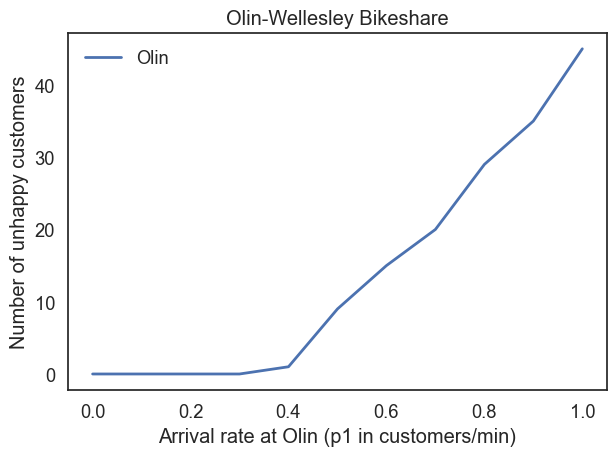

In [5]:
#initialize variables
p2 = 0.2
num_steps = 60
p1_array = linspace(0, 1, 11)

#define function
def sweep_p1(p1_array):
    sweep2 = SweepSeries()
    
    for p1 in p1_array:
        state = run_simulation(p1, p2, num_steps)
        sweep2[p1] = state.olin_empty
    
    return sweep2

sweep = sweep_p1(p1_array)

plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Number of unhappy customers')

Write a function called sweep_p2 that runs simulations with p1=0.5 and a range of values for p2. It should store the results in a SweepSeries and return the SweepSeries.

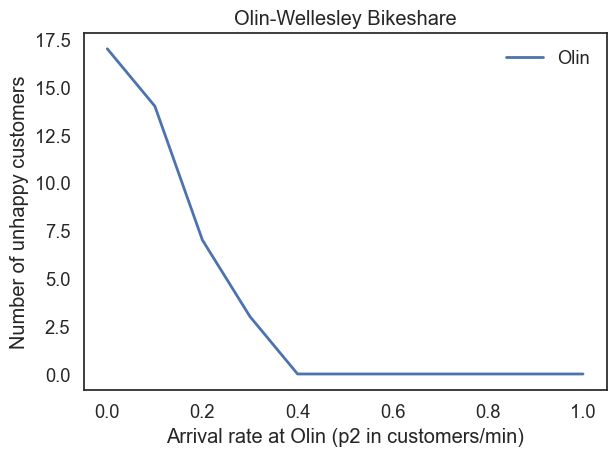

In [6]:
p1 = 0.5
num_steps = 60
p2_array = linspace(0, 1, 11)

def sweep_p2(p2_array):
    sweep = SweepSeries()
    
    for p2 in p2_array:
        state = run_simulation(p1, p2, num_steps)
        sweep[p2] = state.olin_empty
    
    return sweep

sweep = sweep_p2(p2_array)

plot(sweep, label='Olin')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p2 in customers/min)', 
         ylabel='Number of unhappy customers')

### Optional Exercises

Because our simulations are random, the results vary from one run to another, and the results of a parameter sweep tend to be noisy.  We can get a clearer picture of the relationship between a parameter and a metric by running multiple simulations with the same parameter and taking the average of the results.

Write a function called `run_multiple_simulations` that takes as parameters `p1`, `p2`, `num_steps`, and `num_runs`.

`num_runs` specifies how many times it should call `run_simulation`.

After each run, it should store the total number of unhappy customers (at Olin or Wellesley) in a `TimeSeries`.  At the end, it should return the `TimeSeries`.

Test your function with parameters

```
p1 = 0.3
p2 = 0.3
num_steps = 60
num_runs = 10
```

Display the resulting `TimeSeries` and use the `mean` function provided by the `TimeSeries` object to compute the average number of unhappy customers (see Section 2.7).

1.7

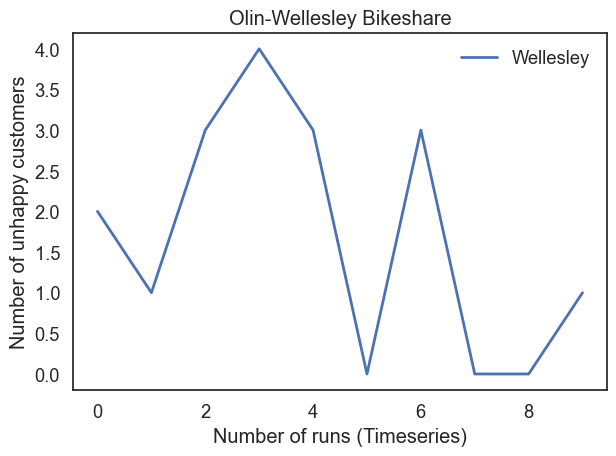

In [7]:
def run_multiple_simulations(p1, p2, num_steps, num_runs):
    
    time = TimeSeries()
    
    for n in range(num_runs):
        state = run_simulation(p1, p2, num_steps)
        time[n] = state.wellesley_empty
    
    return time

run1 = run_multiple_simulations(0.3,0.3,60,10)

plot(run1, label='Wellesley')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Number of runs (Timeseries)', 
         ylabel='Number of unhappy customers')

np.mean(run1)

Continuing the previous exercise, use `run_multiple_simulations` to run simulations with a range of values for `p1` and

```
p2 = 0.3
num_steps = 60
num_runs = 20
```

Store the results in a `SweepSeries`, then plot the average number of unhappy customers as a function of `p1`.  Label the axes.

What value of `p1` minimizes the average number of unhappy customers?

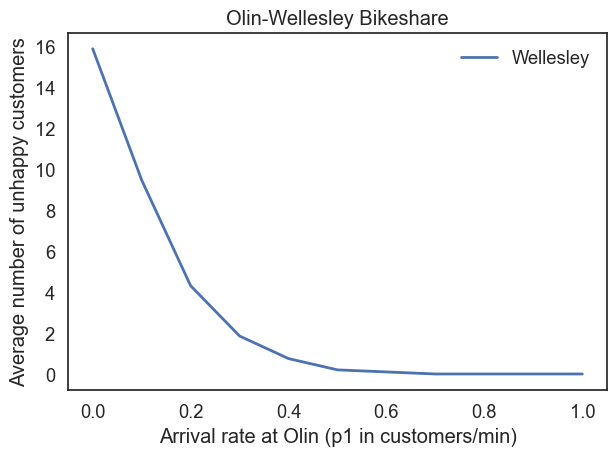

In [8]:
def sweep_multiple_p1(p1_array):
    sweep = SweepSeries()
    
    for p1 in p1_array:
        run = run_multiple_simulations(p1,0.3,60,20)
        sweep[p1] = np.mean(run) 
    
    return sweep

sweep = sweep_multiple_p1(p1_array)

plot(sweep, label='Wellesley')

decorate(title='Olin-Wellesley Bikeshare',
         xlabel='Arrival rate at Olin (p1 in customers/min)', 
         ylabel='Average number of unhappy customers')

It appears that a value of **0.5** minimizes the average number of unhappy customers at Wellesley.

## Chapter 5 Exercises

### Reading data

The data directory contains a downloaded copy of https://en.wikipedia.org/wiki/World_population_estimates

The arguments of `read_html` specify the file to read and how to interpret the tables in the file. The result, tables, is a sequence of DataFrame objects.

From tables we use the bracket operator to select our table of interest and then shorten the column names for easier interpretability.

In [9]:
filename = 'data/World_population_estimates.html'
tables = read_html(filename, header=0, index_col=0, decimal='M')

#There are 6 tables, select the 3rd (index 2)
table2 = tables[2]

#Shorten column names
table2.columns = ['census', 'prb', 'un', 'maddison', 
                  'hyde', 'tanton', 'biraben', 'mj', 
                  'thomlinson', 'durand', 'clark']


### Series

We use dot notation to select columns from our table2 `DataFrame`. The result is a `Series`, which is like a `DataFrame` with a single column. 

Since we're working in units of billions, we divide our entries by `1e9` - scientific notation for $1 \cdot 10^9$  or 1 billion.

We then plot our Series on the same plot, label and save the result as a PDF.

Saving figure to file figs/chap05-fig01.pdf


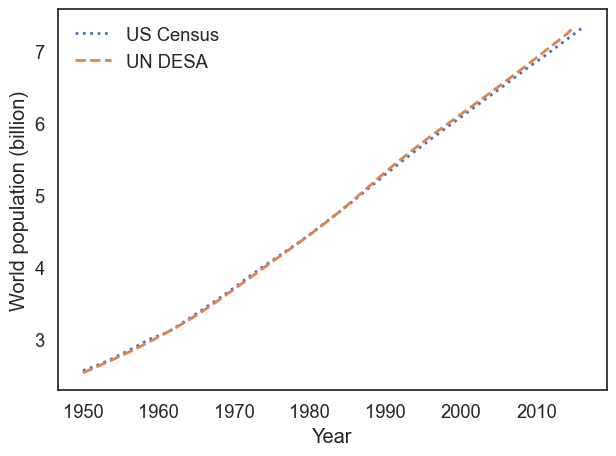

In [10]:
#convert from billions
census = table2.census / 1e9
un = table2.un / 1e9

plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
    
decorate(xlabel='Year',
         ylabel='World population (billion)')

savefig('figs/chap05-fig01.pdf')

The largest relative error between estimates is about 1.3%. Found via:

In [11]:
max(abs(census - un) / un) * 100

1.3821293828998855

We break this expression into smallest components to further understand:

In [12]:
# 1. element-wise difference
census - un

# 2. absolute difference
abs(census - un)

# 3. relative difference
abs(census - un) / un

# 4. percent difference
(abs(census - un) / un) * 100

Year
1950    1.286247
1951    0.858540
1952    0.667365
1953    0.607232
1954    0.628640
          ...   
2012    0.935034
2013    0.977243
2014    1.019023
2015    1.382129
2016         NaN
Length: 67, dtype: float64

### Constant growth

In [13]:
# Grab first and last indices
t_0 = get_first_label(census) #1950
t_end = get_last_label(census) #2016

# Compute elapsed time (years)
elapsed_time = t_end - t_0 #66

# Grab first and last population estimates
p_0 = get_first_value(census) #2.557...
p_end = get_last_value(census) #7.325...

# Compute total growth (billions of people)
total_growth = p_end - p_0 #4.768

# Compute average annual growth (billions of people / years)
annual_growth = total_growth / elapsed_time #0.072...

0.07224800083333333

### Time series

Saving figure to file figs/chap05-fig02.pdf


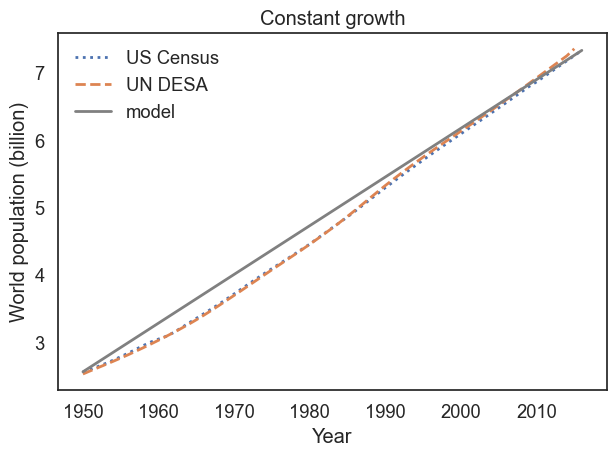

In [14]:
# create TimeSeries
results = TimeSeries()

# initialize starting value
results[t_0] = census[t_0]

# after this the population grows at a constant rate
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

# plot results vs. actual data
plot(census, ':', label='US Census')
plot(un, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

savefig('figs/chap05-fig02.pdf')

### Optional Exercise

Try fitting the model using data from 1970 to the present, and see if that does a better job.

Hint: 

1. Copy the code from above and make a few changes.  Test your code after each small change.

2. Make sure your `TimeSeries` starts in 1950, even though the estimated annual growth is based on later data.

3. You might want to add a constant to the starting value to match the data better.

Saving figure to file figs/chap05-fig03.pdf


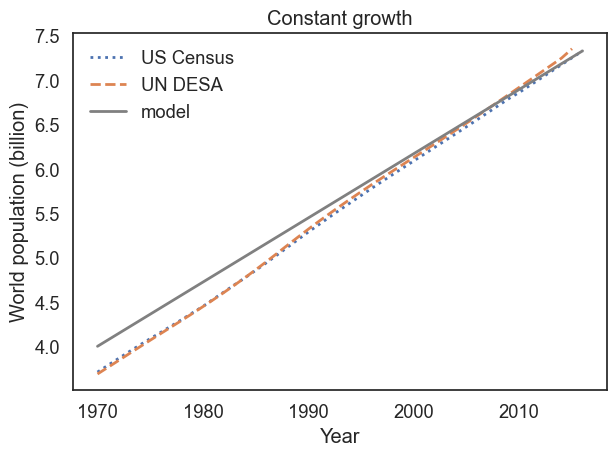

In [15]:
# Approach 1: keep the same starting values etc and just vary the index range

#select proper index range
census70 = census.loc[1970:]
un70 = un.loc[1970:]
results70 = results.loc[1970:]

# plot results vs. actual data for 1970 to present
plot(census70, ':', label='US Census')
plot(un70, '--', label='UN DESA')
plot(results70, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

savefig('figs/chap05-fig03.pdf')

Saving figure to file figs/chap05-fig04.pdf


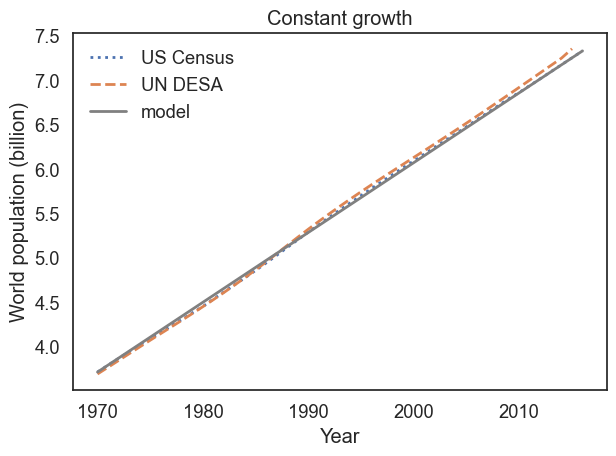

In [16]:
# Approach 2: update Constant Growth and Time Series code to start at 1970

# Grab first and last indices
t_0 = 1970
t_end = get_last_label(census) #2016

# Compute elapsed time (years)
elapsed_time = t_end - t_0 #46

# Grab first and last population estimates
p_0 = census.loc[1970] #2.557...
p_end = get_last_value(census) #7.325...

# Compute total growth (billions of people)
total_growth = p_end - p_0 #3.613...

# Compute average annual growth (billions of people / years)
annual_growth = total_growth / elapsed_time #0.078...

# create TimeSeries
results = TimeSeries()

# initialize starting value - start in 1970
results[t_0] = census[t_0]

# after this the population grows at a constant rate
for t in linrange(t_0, t_end):
    results[t+1] = results[t] + annual_growth

# plot results vs. actual data
plot(census70, ':', label='US Census')
plot(un70, '--', label='UN DESA')
plot(results, color='gray', label='model')

decorate(xlabel='Year', 
         ylabel='World population (billion)',
         title='Constant growth')

savefig('figs/chap05-fig04.pdf')

Approach 2 appears to have produced a more precise model than Approach 1. Updating the setup code appears to have resulted in superior performance to just updating the date / index range.